In [325]:
import scanpy as sc
import anndata
import numpy as np
from scipy import sparse
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
import time as tm
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    f1_score,
    r2_score,
    mean_squared_error,
)
import pertpy as pt
import scipy.stats as stats
import sys
sys.path.append("../../function/")
import lazy_reg
import lightgbm

2023-11-18 21:32:01.316444: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 21:32:01.316685: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 21:32:01.317030: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: module 'ml_dtypes' has no attribute 'float8_e4m3b11'

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [2]:
adata

NameError: name 'adata' is not defined

In [215]:
sc.settings.figdir="../result/11.17_pseudo_model_selection/"
sc.settings._vector_friendly=True

In [149]:
import palantir

In [4]:
adata=sc.read("../../temp_data/10.27_dpt_sub.h5ad")

In [5]:
rf_gene=pd.read_csv("../../important_processed_data/10.29_rf_importance_gene.csv")

In [6]:
lineage=pd.read_csv("../../important_processed_data/11.2_dpt_lineage_infer.csv",index_col=0)

In [7]:
gene=rf_gene["gene"][rf_gene["importance"]>0.000008]
adata=adata[:,gene]

In [8]:
dpt=pd.read_csv("../processed_data/11.16_new_dpt.csv")

In [188]:
adata.obs["dpt_label"][lineage['lineage_chondro']]=dpt['dpt_single'].values[lineage['lineage_chondro']]

In [190]:
label=adata.obs["dpt_label"].values

In [26]:
adata.obs["dpt_label"]=label

In [29]:
dpt_downsample=sc.pp.subsample(adata,fraction=0.1,copy=True)

In [334]:
def minmax_normalise(arr):
        
    norm_arr = []
    arr = np.asarray(arr)
    arr_max = max(arr)
    arr_min = min(arr)
    for i in range(len(arr)):
        norm_arr.append((arr[i] - arr_min )/(arr_max  - arr_min )) 
    return norm_arr

In [10]:
label=minmax_normalise(dpt["new_dpt"])
dataDf=adata.layers["counts"].toarray()

In [30]:
label=dpt_downsample.obs["dpt_label"].values
predictDf=dpt_downsample.layers["counts"].toarray()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
     predictDf, label, test_size=0.4, random_state=0)

In [34]:
reg = lazy_reg.LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None,predictions=True)

In [ ]:
models,predictions = reg.fit(X_train, X_test, y_train, y_test,input=dataDf)

 27%|██▋       | 10/37 [1:08:50<4:17:43, 572.71s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 35%|███▌      | 13/37 [1:33:03<3:08:39, 471.63s/it]Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fa936462560>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/home/zhanglab/mambaforge/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/home/zhanglab/mambaforge/envs/py310/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /home/zhanglab/mambaforge/en

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


In [46]:
reg2 = lazy_reg.LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None,predictions=True)

In [50]:
reg.models["AdaBoostRegressor"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145],
           dtype='int64', length=2146)),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Int64Index([], dtype='int64')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Int64Index([], dtype='int64'))])),
                ('regressor', AdaBoostRegressor(random_state=42))])

In [53]:
from tqdm import tqdm
reg.regressors

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sklearn.linear_model._huber.HuberRegressor),
 ('KNeighborsRegressor', sklearn.neighbors._re

In [60]:
pred_time={}
for name in tqdm(reg.models.keys()):
    pipe=reg.models[name]
    prediction_temp=pipe.predict(dataDf)
    pred_time[name]=prediction_temp


100%|██████████| 35/35 [46:09<00:00, 79.13s/it] 


In [63]:
predDf=pd.DataFrame(pred_time)

In [77]:
predDf.to_parquet("../processed_data/11.16_pseudo_predict_model/11.17_prediction.parquet")

In [74]:
models.to_excel("../processed_data/11.16_lazy_pred_metrics.xls")

In [59]:
reg.models.keys()

dict_keys(['AdaBoostRegressor', 'BaggingRegressor', 'BayesianRidge', 'DecisionTreeRegressor', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'ExtraTreeRegressor', 'ExtraTreesRegressor', 'GradientBoostingRegressor', 'HistGradientBoostingRegressor', 'HuberRegressor', 'KNeighborsRegressor', 'KernelRidge', 'Lars', 'LarsCV', 'Lasso', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'LinearSVR', 'MLPRegressor', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveRegressor', 'PoissonRegressor', 'RandomForestRegressor', 'Ridge', 'RidgeCV', 'SVR', 'TransformedTargetRegressor', 'TweedieRegressor', 'XGBRegressor', 'LGBMRegressor'])

In [39]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.92,0.95,0.06,355.01
HistGradientBoostingRegressor,0.92,0.95,0.06,569.53
ExtraTreesRegressor,0.92,0.94,0.06,1982.71
XGBRegressor,0.90,0.93,0.07,192.00
RandomForestRegressor,0.90,0.93,0.07,2273.25
GradientBoostingRegressor,0.88,0.92,0.08,707.61
BaggingRegressor,0.88,0.92,0.08,332.73
SVR,0.80,0.86,0.10,2129.09
DecisionTreeRegressor,0.75,0.83,0.11,127.35


In [17]:
models

NameError: name 'models' is not defined

In [31]:
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [33]:
model_4 = Sequential([
    Dense(1000, activation='relu', input_shape=(2146,)),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
])

In [34]:
model=model_4
def adjusted_rsquared(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

model.compile(loss='mean_squared_error', optimizer='adam')
start=tm.time()              
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(X_train_2, y_train_2,
        batch_size=200, epochs=100,
        validation_data=(X_val, y_val),callbacks=[early_stopping])


ypred = model.predict(X_test)
ts_time=tm.time()-start
r2 = sklearn.metrics.r2_score(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
rmse = np.sqrt(mean_squared_error(y_test, ypred))
adj_rsquared = adjusted_rsquared(
        r2, X_test.shape[0], X_test.shape[1]
)

Epoch 1/100
449/449 [==============================] - 64s 123ms/step - loss: 0.4349 - val_loss: 0.0509
Epoch 2/100
449/449 [==============================] - 43s 95ms/step - loss: 0.0267 - val_loss: 0.0146
Epoch 3/100
449/449 [==============================] - 52s 117ms/step - loss: 0.0108 - val_loss: 0.0085
Epoch 4/100
449/449 [==============================] - 48s 107ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 5/100
449/449 [==============================] - 60s 133ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 6/100
449/449 [==============================] - 51s 113ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 7/100
449/449 [==============================] - 44s 97ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 8/100
449/449 [==============================] - 38s 84ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 9/100
449/449 [==============================] - 53s 119ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 10/100
449/449 [==============================] - 57s 127ms/s

In [36]:
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
print(mean_absolute_error(y_test, ypred))
print(r2)

MSE:  0.0017919135393826672
RMSE:  0.0008959567696913336
0.028235880696962985
0.9754994837421468


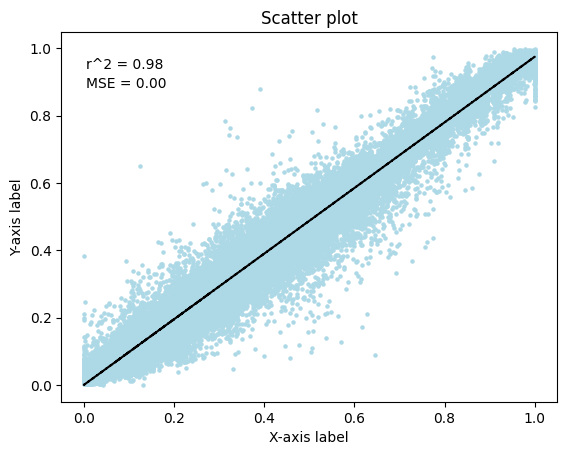

MSE:  0.0017919135393826672
RMSE:  0.0008959567696913336
0.028235880696962985


<Figure size 640x480 with 0 Axes>

In [38]:
r2 = sklearn.metrics.r2_score(y_test, ypred)
plt.scatter(y_test, ypred,s=5, marker='o',color='lightblue',rasterized=True)
plt.plot(y_test, y_test*r2, color='black', linestyle='--', label='Regression Line')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')

plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate('MSE = {:.2f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(y_test, ypred)
plt.savefig("../result/11.15_mes_lineage_modify/11.16_model4_prediction_scatter.pdf")
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(y_test, ypred)
print(mean_absolute_error(y_test, ypred))

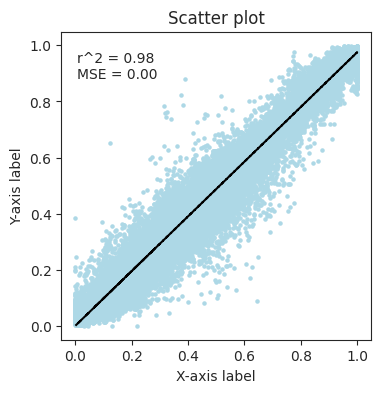

MSE:  0.0017919135393826672
RMSE:  0.0008959567696913336
0.028235880696962985


In [93]:
r2 = sklearn.metrics.r2_score(y_test, ypred)
plt.scatter(label, dpt_pred,s=5, marker='o',color='lightblue',rasterized=True)
plt.plot(y_test, y_test*r2, color='black', linestyle='--', label='Regression Line')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')

plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate('MSE = {:.2f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(y_test, ypred)
print(mean_absolute_error(y_test, ypred))

In [105]:
metric_dict={"R_square":r2,"MSE":mse,"RMSE": mse*(1/2.0),"MAE":mae,"Predict time":ts_time"}
metric_table=pd.DataFrame.from_dict(data=metric_dict, orient='index', columns=['Value'])

In [107]:
metric_table

,Value
R_square,0.975499
MSE,0.001792
RMSE,0.000896
MAE,0.028236
Predict time,3878.437449


In [108]:
metric_table.to_csv("../processed_data/11.16_pseudo_predict_model/model4_metrics.csv")

In [39]:
dpt_pred = model.predict(dataDf)

5194/5194 [==============================] - 44s 9ms/step


In [40]:
adata.obs["model_pred_dpt"]=dpt_pred

/tmp/ipykernel_2821538/4111887475.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["model_pred_dpt"]=dpt_pred


In [41]:
adata.obs["model_pred_dpt"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0    0.655852
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0    0.552819
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0    0.621615
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0    0.605587
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0    0.631337
                                                  ...   
TTTGACTGTATTTCCT-1_5-1-2                        0.380896
TTTGACTGTTGCATTG-1_5-1-2                        0.288728
TTTGACTTCTTGGGCG-1_5-1-2                        0.406919
TTTGGAGCAGCGACAA-1_5-1-2                        0.943388
TTTGGTTCACTACTTT-1_5-1-2                        0.870177
Name: model_pred_dpt, Length: 166204, dtype: float32

In [48]:
model_4.save("../processed_data/11.16_pseudo_predict_model/11.16_layer7_model")

INFO:tensorflow:Assets written to: ../processed_data/11.16_pseudo_predict_model/11.16_layer7_model/assets


INFO:tensorflow:Assets written to: ../processed_data/11.16_pseudo_predict_model/11.16_layer7_model/assets


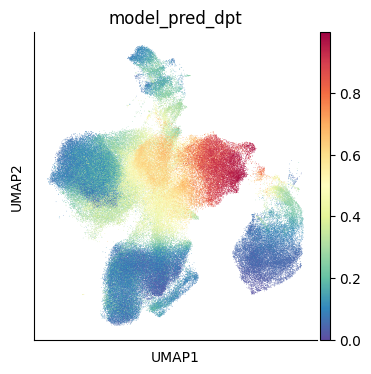

In [47]:
sc.pl.umap(adata,color="model_pred_dpt",palette="RdBu_r")

In [79]:
milo = pt.tl.Milo()
mdata = milo.load(adata)
sc.pp.neighbors(mdata['rna'], use_rep='X_scANVI', n_neighbors=30, n_pcs=15)

In [80]:
milo.make_nhoods(mdata['rna'], prop=0.01)

In [86]:
nhoods=adata.obsm["nhoods"]
indexCell=adata.obs_names[adata.obs["nhood_ixs_refined"] == 1]

In [97]:
X_train.shape

(99722, 2146)

In [98]:
X_test.shape

(66482, 2146)

In [89]:
lineage1=lineage["lineage_chondro"]
lineage2=lineage["lineage_laFibro"]
lineage3=lineage["lineage_lepr"]
lineage4=lineage["lineage_mesenchyme"]

In [66]:
filterBool_1=nhoods[:,1].toarray().astype(bool).flatten()
dpt=label


In [75]:
label1=label[filterBool_1&lineage1]
label2=label[filterBool_1&lineage2]
label3=label[filterBool_1&lineage3]
label4=label[filterBool_1&lineage4]
f_statistic, p_value = stats.f_oneway(label1, label2, label3,label4)

In [82]:
label2

array([0.37769532, 0.39852537, 0.44425817, 0.37937425, 0.38049397,
       0.36574236, 0.4400813 , 0.39282818])

In [81]:
stats.f_oneway(label2,label4)

F_onewayResult(statistic=1515.4142496750626, pvalue=9.334993131054846e-43)

In [81]:
f_statistic_list

NameError: name 'f_statistic_list' is not defined

In [93]:
len(filterBool_1&lineage1)

166204

In [102]:
timePred.values[filterBool_1&lineage4]

array([0.44274208, 0.49204902, 0.48150584, 0.48095486, 0.4709504 ,
       0.46398677, 0.43464929, 0.45916929, 0.44274208, 0.48095486,
       0.46398677, 0.49074259, 0.47186674, 0.45250809, 0.45250809,
       0.43811385, 0.43811385, 0.46398677, 0.46398677, 0.45250809,
       0.4709504 , 0.48095486, 0.47846112, 0.46398677, 0.44463563,
       0.47032058, 0.45250809, 0.44463563, 0.47846112, 0.45916929,
       0.42269654, 0.35850875, 0.42345691, 0.36172235, 0.45916929,
       0.44274208, 0.49204902, 0.48095486, 0.53766513])

In [103]:
f_statistic_Dict={}
f_statistic_Orig={}
p_value_Orig={}
for methods in tqdm(predDf.columns):
    timePred=predDf[methods].values
    f_statistic_list=[]
    p_value_list=[]
    for i in range(nhoods.shape[1]):
        filterBool_1=nhoods[:,i].toarray().astype(bool).flatten()
        label1=timePred[filterBool_1&lineage1]
        label2=timePred[filterBool_1&lineage2]
        label3=timePred[filterBool_1&lineage3]
        label4=timePred[filterBool_1&lineage4]
        non_empty_groups = [group for group in [label1, label2, label3,label4] if len(group) > 0]
        # Check if there are at least two non-empty groups
        if len(non_empty_groups) < 2:
            continue
        else:
            f_statistic, p_value = stats.f_oneway(*non_empty_groups)
            f_statistic_list.append(f_statistic)
            p_value_list.append(p_value)
    f_statistic_Orig[methods]=np.array(f_statistic_list)
    p_value_Orig[methods]=np.array(p_value_list)
    f_statistic_Dict[methods]=np.mean(f_statistic_list)


100%|██████████| 35/35 [04:31<00:00,  7.77s/it]


In [118]:
rsmeDf=predictions["RMSE"]

In [109]:
pd.DataFrame(f_statistic_Dict)

ValueError: If using all scalar values, you must pass an index

In [111]:
filtered_dict = {key: value for key, value in f_statistic_Dict.items() if value is not None and not np.isnan(value)}

In [116]:
F_df=pd.DataFrame(filtered_dict,index=[0]).T

In [122]:
F_df.columns=["ANOVA"]

In [123]:
result = pd.merge(F_df, rsmeDf, left_index=True, right_index=True)

In [130]:
result=result[result['RMSE']<0.2]

In [133]:
result["Name"]=result.index

In [135]:
len(result["ANOVA"])

25

In [137]:
result["Name"][i]

'LGBMRegressor'

In [181]:
metric_result = pd.merge(predictions, F_df, left_index=True, right_index=True)

In [182]:
metric_result.to_excel("../result/11.17_pseudo_model_selection/pseudo_metrics.xls")

In [183]:
metric_result

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,ANOVA
LGBMRegressor,0.92,0.95,0.06,355.01,33.14
HistGradientBoostingRegressor,0.92,0.95,0.06,569.53,33.32
ExtraTreesRegressor,0.92,0.94,0.06,1982.71,39.52
XGBRegressor,0.90,0.93,0.07,192.00,24.05
RandomForestRegressor,0.90,0.93,0.07,2273.25,36.13
GradientBoostingRegressor,0.88,0.92,0.08,707.61,21.72
BaggingRegressor,0.88,0.92,0.08,332.73,27.43
SVR,0.80,0.86,0.10,2129.09,9.31
DecisionTreeRegressor,0.75,0.83,0.11,127.35,13.07
AdaBoostRegressor,0.68,0.79,0.12,356.42,30.06


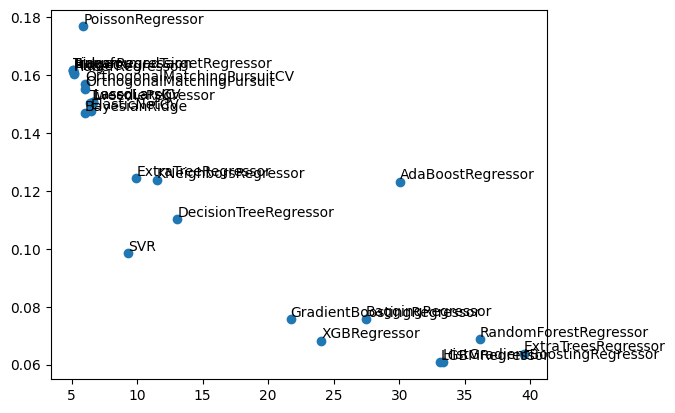

In [139]:
plt.scatter(x=result["ANOVA"],y=result["RMSE"])
for i in range(len(result["ANOVA"])): 
    plt.annotate(result["Name"][i], (result["ANOVA"][i], result["RMSE"][i] + 0.001)) 

In [147]:
adata.obs["SVR_time"]=predDf["SVR"].values

In [158]:
adata.obs["XGBRegressor_time"]=predDf["XGBRegressor"].values

In [ ]:
adata.obs["SVR_time"]

In [163]:
adata.obs["dpt_single"]=dpt["dpt_single"].values

In [145]:
predDf["SVR"]

0        0.54
1        0.55
2        0.76
3        0.61
4        0.70
         ... 
166199   0.45
166200   0.27
166201   0.46
166202   0.83
166203   0.36
Name: SVR, Length: 166204, dtype: float64

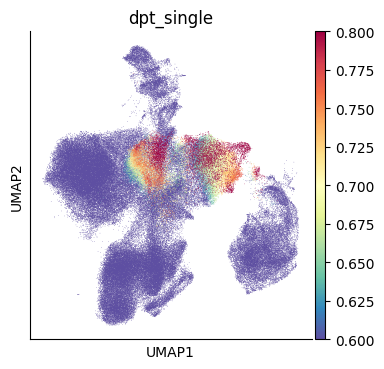

In [171]:
sc.pl.umap(adata,color=["dpt_single"],vmin=0.6,vmax=0.8)

(array([13603.,  3495.,  1281.,  1089.,  1618.,   196.,    92.,   155.,
          288.,   298.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

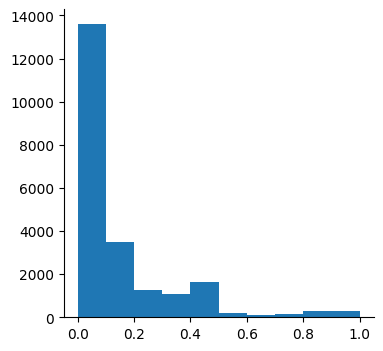

In [174]:
plt.hist(dpt["dpt_single"].values[lineage['lineage_chondro']],bins=10)

In [ ]:
dpt["dpt_single"].values[lineage['lineage_chondro']]

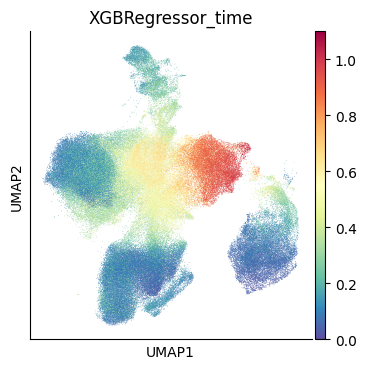

In [160]:
sc.pl.umap(adata,color="XGBRegressor_time",vmin=0)

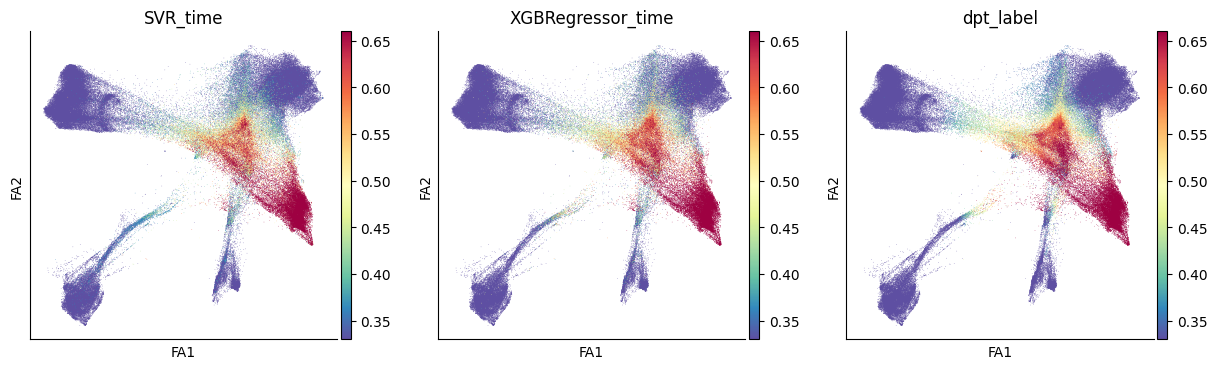

In [168]:
sc.pl.draw_graph(adata,color=["SVR_time","XGBRegressor_time","dpt_label"],vmin=0.33,vmax=0.66)

In [153]:
adata.obs[]

AnnData object with n_obs × n_vars = 166204 × 2146
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei

In [88]:
np.mean(f_statistic_list)

232.50365404374838

In [90]:
adata.obs["model_pred_dpt"].values

array([0.6558524 , 0.5528187 , 0.621615  , ..., 0.40691924, 0.94338834,
       0.8701774 ], dtype=float32)

In [94]:
f_statistic_list_pred=[]
p_value_list_pred=[]
stat=adata.obs["model_pred_dpt"].values
for i in range(nhoods.shape[1]):
    filterBool_1=nhoods[:,i].toarray().astype(bool).flatten()
    label1=stat[filterBool_1&lineage1]
    label2=stat[filterBool_1&lineage2]
    label3=stat[filterBool_1&lineage3]
    label4=stat[filterBool_1&lineage4]
    non_empty_groups = [group for group in [label1, label2, label3,label4] if len(group) > 0]
    # Check if there are at least two non-empty groups
    if len(non_empty_groups) < 2:
        continue
    else:
        f_statistic, p_value = stats.f_oneway(*non_empty_groups)
        f_statistic_list_pred.append(f_statistic)
        p_value_list_pred.append(p_value)

In [95]:
np.mean(f_statistic_list_pred)

86.43277977010102

In [180]:
np.sqrt(0.00179191353938266)

0.04233099974466301

## We select LGBMRegressor in R, now we use this to predict

In [194]:
model=lightgbm.LGBMRegressor(n_jobs=-1)

In [199]:
dataDf.shape

(166204, 2146)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
     dataDf, label, test_size=0.4, random_state=0)

In [200]:
start=tm.time()
model.fit(X_train, y_train)
tr_time=tm.time()-start
start=tm.time()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.444193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458281
[LightGBM] [Info] Number of data points in the train set: 9972, number of used features: 2146
[LightGBM] [Info] Start training from score 0.280603


NameError: name 'ridge' is not defined

In [202]:
ypred = model.predict(X_test)
ts_time=tm.time()-start
def adjusted_rsquared(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))
ypred = model.predict(X_test)
ts_time=tm.time()-start
r2 = sklearn.metrics.r2_score(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
rmse = np.sqrt(mean_squared_error(y_test, ypred))
adj_rsquared = adjusted_rsquared(
        r2, X_test.shape[0], X_test.shape[1]
)

In [205]:
print(rmse)
print(r2)

0.060875232163361964
0.9477737356371285


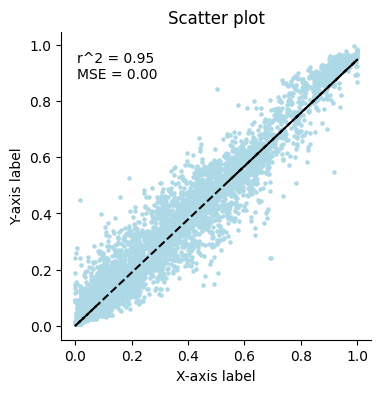

In [209]:
plt.scatter(y_test, ypred,s=5, marker='o',color='lightblue',rasterized=True)
plt.plot(y_test, y_test*r2, color='black', linestyle='--', label='Regression Line')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')

plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate('MSE = {:.2f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction')
plt.savefig("../result/11.17_pseudo_model_selection//11.17_lightgbm_prediction_scatter.pdf")
# Display the plot
plt.show()

In [210]:
lightDpt=model.predict(dataDf)

In [211]:
adata.obs["lightGBM"]=lightDpt

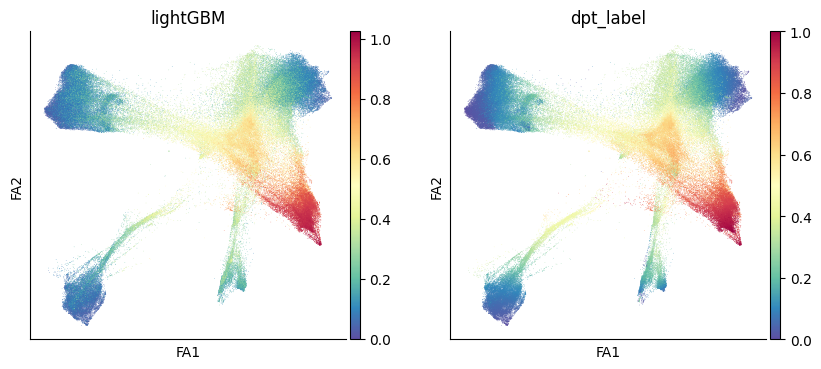

In [216]:
sc.pl.draw_graph(adata,color=["lightGBM","dpt_label"],save="_lightGBM_pred")

In [218]:
pd.DataFrame(adata.obs["lightGBM"]).to_parquet("../../important_processed_data/11.17_lightGBM_dpt.parquet")

In [204]:
new_dpt=pd.read_csv("../processed_data/11.16_new_dpt.csv",index_col=0)

In [211]:
adata.obs["lineage_mesenchyme"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0     True
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0     True
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0     True
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0     True
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0     True
                                                ...  
TTTGACTGTATTTCCT-1_5-1-2                        False
TTTGACTGTTGCATTG-1_5-1-2                        False
TTTGACTTCTTGGGCG-1_5-1-2                        False
TTTGGAGCAGCGACAA-1_5-1-2                        False
TTTGGTTCACTACTTT-1_5-1-2                        False
Name: lineage_mesenchyme, Length: 166204, dtype: bool

In [264]:
mes=adata[adata.obs["lineage_mesenchyme"]]

In [217]:
new_dpt

,new_dpt,pseudotime_norm,dpt_single,dpt_pseudotime
Unnamed: 0,,,,
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,0.791711,0.388593,0.791711,0.023907
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,0.653136,0.895327,0.653136,0.011629
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,0.773970,0.926362,0.773970,0.010862
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0,0.714997,0.589643,0.714997,0.018808
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0,0.812712,0.458090,0.812712,0.020474
...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,0.468474,0.468474,0.510338,0.020599
TTTGACTGTTGCATTG-1_5-1-2,0.565631,0.565631,0.528667,0.022183
TTTGACTTCTTGGGCG-1_5-1-2,0.508646,0.508646,0.447999,0.033691


In [268]:
mes.obs["dpt_single"]=new_dpt.loc[mes.obs_names]["dpt_single"]

(array([  663.,   610.,   411.,   364.,   896.,  1826.,  3556.,  6084.,
        10836.,  8543.,  9555.,  5923.,  2998.,  2880.,  1676.,   874.,
          483.,   273.,   314.,   383.,   217.,   205.,   203.,   108.,
          193.,   107.,    90.,   131.,   204.,   260.,   207.,    43.,
          425.,   215.,   299.,   388.,   339.,   271.,   294.,   148.,
          168.,    72.,    53.,    27.,    18.,    32.,    27.,    21.,
           18.,    15.]),
 array([-0.05      , -0.02567623, -0.00135246,  0.02297132,  0.04729509,
         0.07161886,  0.09594263,  0.1202664 ,  0.14459017,  0.16891395,
         0.19323772,  0.21756149,  0.24188526,  0.26620903,  0.2905328 ,
         0.31485658,  0.33918035,  0.36350412,  0.38782789,  0.41215166,
         0.43647543,  0.46079921,  0.48512298,  0.50944675,  0.53377052,
         0.55809429,  0.58241806,  0.60674184,  0.63106561,  0.65538938,
         0.67971315,  0.70403692,  0.7283607 ,  0.75268447,  0.77700824,
         0.80133201,  0.8256557

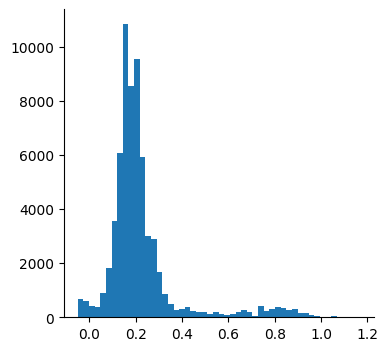

In [222]:
plt.hist(mes.obs["palantir_norm"],bins=50)

(array([ 631., 1328., 2560., 5030., 6470., 5653., 4233., 2476., 2127.,
        1502., 1396., 1311., 1221., 1097., 1149., 1401., 1422., 1554.,
        1514.,  911.,  930.,  871.,  710.,  907.,  742.,  994., 1022.,
        1431., 1320., 1511., 1492., 1642.,  809.,  981.,  828.,  521.,
         364.,  359.,  263.,  295.,  212.,  152.,  131.,   81.,   86.,
          64.,   63.,   52.,   85.,   42.]),
 array([0.        , 0.02415566, 0.04831132, 0.07246699, 0.09662265,
        0.12077831, 0.14493397, 0.16908963, 0.1932453 , 0.21740096,
        0.24155662, 0.26571228, 0.28986795, 0.31402361, 0.33817927,
        0.36233493, 0.38649059, 0.41064626, 0.43480192, 0.45895758,
        0.48311324, 0.5072689 , 0.53142457, 0.55558023, 0.57973589,
        0.60389155, 0.62804722, 0.65220288, 0.67635854, 0.7005142 ,
        0.72466986, 0.74882553, 0.77298119, 0.79713685, 0.82129251,
        0.84544817, 0.86960384, 0.8937595 , 0.91791516, 0.94207082,
        0.96622649, 0.99038215, 1.01453781, 1.03869347, 

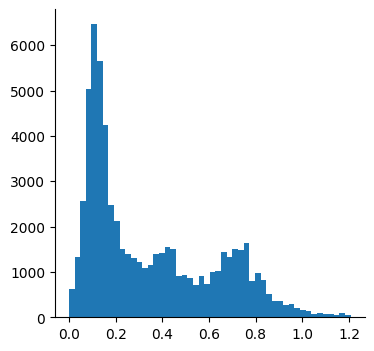

In [223]:
plt.hist(mes.obs["dpt_single"],bins=50)

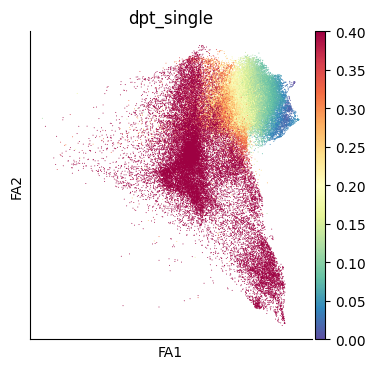

In [252]:
sc.pl.draw_graph(mes,color="dpt_single",vmax=0.5)

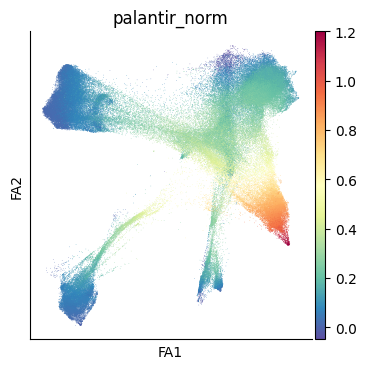

In [311]:
sc.pl.draw_graph(adata,color="palantir_norm")

In [285]:
(mes.obs["dpt_single"]<0.3)&(mes.obs["palantir_norm"]<0.2)

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0                        False
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0                        False
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0                        False
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0                        False
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0                        False
                                                                    ...  
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGCATAACAGA-1_3-1    False
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCCATATGG-1_3-1    False
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGACCATA-1_3-1     True
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGTTGTAG-1_3-1    False
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCTGCGGCA-1_3-1    False
Length: 63946, dtype: bool

In [342]:
mes_time=mes.obs["palantir_norm"].values.copy()


In [343]:
mes_time[(mes.obs["dpt_single"]<0.4)]=mes.obs["dpt_single"][(mes.obs["dpt_single"]<0.4)]

In [344]:
mes.obs["dpt_test"]=mes_time.copy()

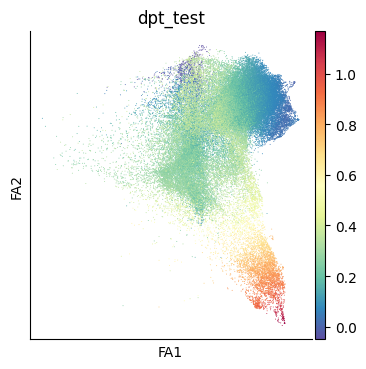

In [345]:
sc.pl.draw_graph(mes,color=["dpt_test"])

In [314]:
adata.obs["dpt_label"]=adata.obs["palantir_norm"]

In [316]:
adata.obs["dpt_label"][adata.obs['lineage_chondro']]=new_dpt['dpt_single'].values[adata.obs['lineage_chondro']]

In [317]:
adata.obs["dpt_label"][adata.obs['lineage_mesenchyme']]=mes_time.copy()

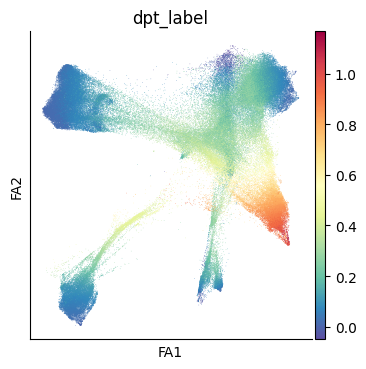

In [318]:
sc.pl.draw_graph(adata,color="dpt_label")

In [437]:
# Make chondro lineage exponential distribution
chondroDpt=adata.obs["dpt_label"][adata.obs['lineage_chondro']]

In [471]:
from scipy.stats import rankdata
rnkDpt=rankdata(chondroDpt)/len(chondroDpt)

In [479]:
chondroTime= np.exp(rnkDpt * 3) / np.exp(3)

(array([7870., 3719., 2460., 1842., 1472., 1227., 1051.,  920.,  817.,
         737.]),
 array([0.04979382, 0.14481444, 0.23983506, 0.33485568, 0.42987629,
        0.52489691, 0.61991753, 0.71493815, 0.80995876, 0.90497938,
        1.        ]),
 <BarContainer object of 10 artists>)

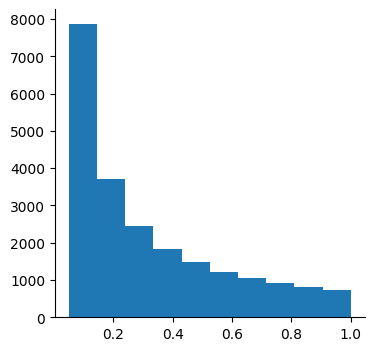

In [480]:
plt.hist(chondroTime)

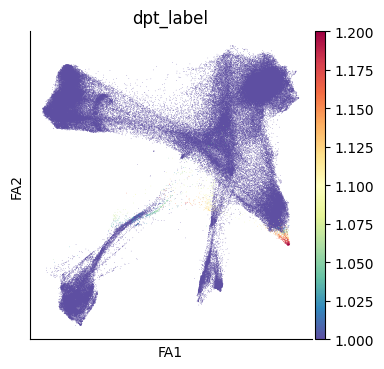

In [518]:
sc.pl.draw_graph(adata,color=["dpt_label"],vmin=1)

In [521]:
adata.obs["dpt_label"][adata.obs["dpt_label"]>1]=1

In [522]:
adata.obs["dpt_label"][adata.obs['lineage_chondro']]=chondroTime

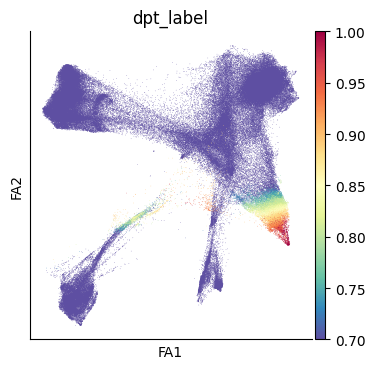

In [524]:
sc.pl.draw_graph(adata,color="dpt_label",vmin=0.7)

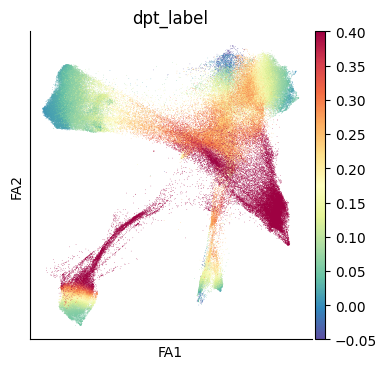

In [527]:
sc.pl.draw_graph(adata,color="dpt_label",vmax=0.4)

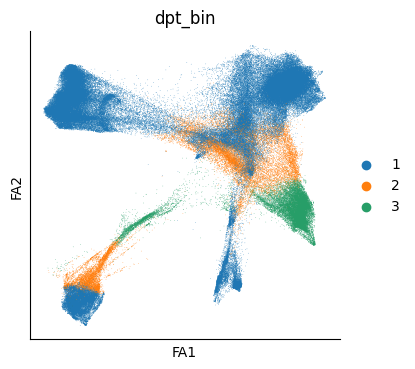

In [536]:
dpt=adata.obs["dpt_label"]
num_bins = 3
hist, bin_edges = np.histogram(dpt, bins=num_bins)
dpt_bin=np.digitize(dpt, bin_edges)
adata.obs["dpt_bin"]=dpt_bin
adata.obs["dpt_bin"][adata.obs["dpt_bin"]==4]=3
adata.obs["dpt_bin"]=adata.obs["dpt_bin"].astype(str)
adata.obs["dpt_bin"]=np.array(adata.obs["dpt_bin"].values)
sc.pl.draw_graph(adata,color=["dpt_bin"])

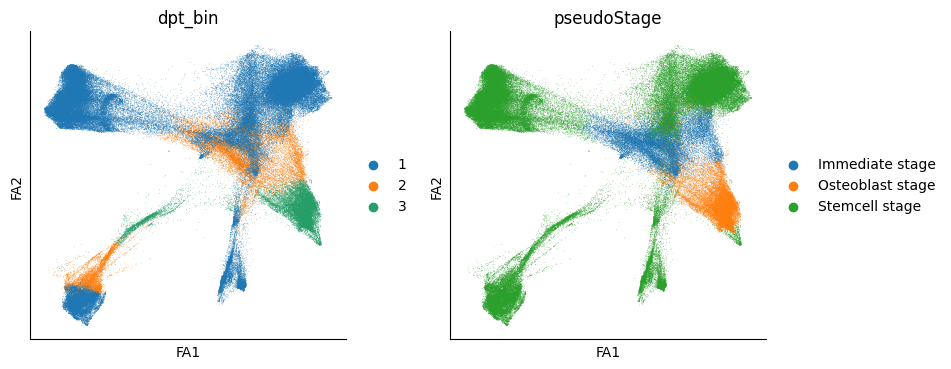

In [540]:
adata.obs["pseudoStage"]="Stemcell stage"
adata.obs["pseudoStage"][adata.obs["C19_named"]=="Ob"]="Osteoblast stage"
adata.obs["pseudoStage"][adata.obs["C19_named"]=="Pre-ob"]="Immediate stage"
sc.pl.draw_graph(adata,color=["dpt_bin","pseudoStage"],save="_3bins_and_stage")

In [539]:
adata.obs["pseudoStage"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0      Stemcell stage
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0    Osteoblast stage
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0    Osteoblast stage
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0     Immediate stage
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0     Immediate stage
                                                      ...       
TTTGACTGTATTTCCT-1_5-1-2                         Immediate stage
TTTGACTGTTGCATTG-1_5-1-2                         Immediate stage
TTTGACTTCTTGGGCG-1_5-1-2                          Stemcell stage
TTTGGAGCAGCGACAA-1_5-1-2                        Osteoblast stage
TTTGGTTCACTACTTT-1_5-1-2                        Osteoblast stage
Name: pseudoStage, Length: 166204, dtype: category
Categories (3, object): ['Immediate stage', 'Osteoblast stage', 'Stemcell stage']

In [ ]:
sc.pl.draw_graph(adata,color=["dpt_bin"])

In [534]:
dpt_bin

array([1, 2, 2, ..., 3, 3, 2])

In [ ]:
sc.pl.draw_graph(adata,color=["dpt_label"],vmin=1)

(array([7.100e+01, 6.090e+02, 2.030e+03, 2.902e+03, 2.616e+03, 1.909e+03,
        1.536e+03, 1.211e+03, 8.900e+02, 7.140e+02, 5.340e+02, 4.550e+02,
        3.740e+02, 3.040e+02, 2.740e+02, 2.460e+02, 2.130e+02, 2.310e+02,
        1.780e+02, 1.680e+02, 1.690e+02, 1.260e+02, 1.370e+02, 1.180e+02,
        1.240e+02, 1.180e+02, 1.430e+02, 1.020e+02, 1.090e+02, 1.120e+02,
        1.270e+02, 1.040e+02, 1.150e+02, 1.440e+02, 1.200e+02, 1.700e+02,
        1.760e+02, 1.980e+02, 1.630e+02, 2.260e+02, 2.230e+02, 1.960e+02,
        1.750e+02, 1.480e+02, 1.120e+02, 7.100e+01, 5.500e+01, 4.100e+01,
        2.800e+01, 2.600e+01, 1.500e+01, 4.000e+00, 1.000e+01, 5.000e+00,
        1.200e+01, 1.100e+01, 2.000e+00, 9.000e+00, 8.000e+00, 1.000e+01,
        1.400e+01, 8.000e+00, 6.000e+00, 9.000e+00, 1.300e+01, 1.200e+01,
        7.000e+00, 9.000e+00, 1.400e+01, 1.300e+01, 7.000e+00, 1.600e+01,
        1.600e+01, 1.100e+01, 1.300e+01, 1.700e+01, 1.100e+01, 1.800e+01,
        1.500e+01, 1.300e+01, 1.600e+0

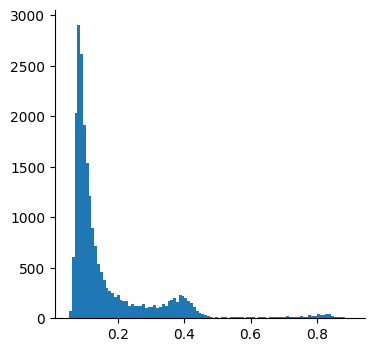

In [441]:
plt.hist(lightDpt[adata.obs['lineage_chondro']],bins=100)

In [541]:
model=lightgbm.LGBMRegressor(n_jobs=-1)

In [542]:
dataDf=adata.layers["counts"].toarray()

In [543]:
label=adata.obs["dpt_label"]

In [544]:
start=tm.time()
model.fit(dataDf, label)
tr_time=tm.time()-start



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 8.844578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 529090
[LightGBM] [Info] Number of data points in the train set: 166204, number of used features: 2146
[LightGBM] [Info] Start training from score 0.237932


In [545]:
lightDpt=model.predict(dataDf)

In [546]:
adata.obs["light_pred"]=lightDpt

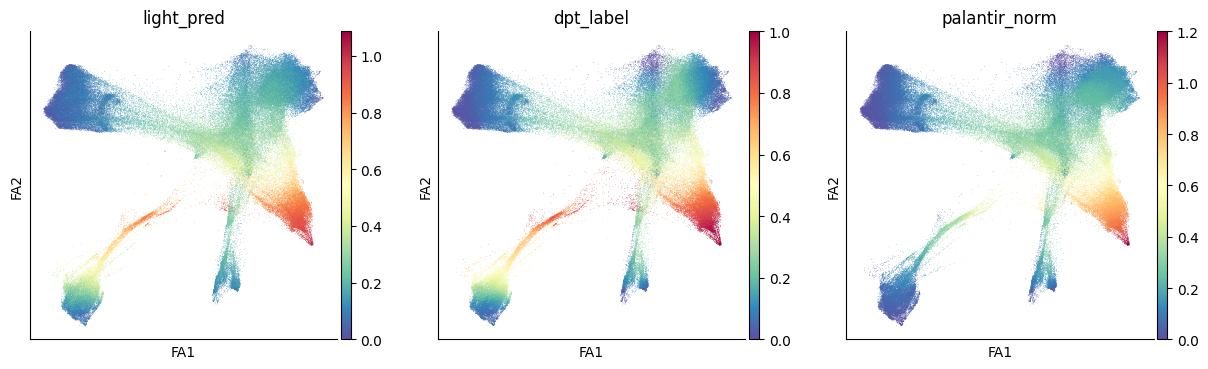

In [547]:
sc.pl.draw_graph(adata,color=["light_pred","dpt_label","palantir_norm"],vmin=0)

In [ ]:
plt.hist()

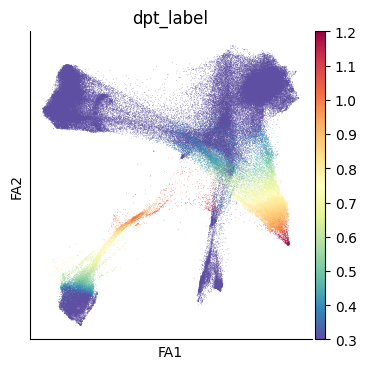

In [516]:
sc.pl.draw_graph(adata,color=["dpt_label"],vmin=1)

In [587]:
import joblib
# save model
joblib.dump(model, '../processed_data/11.16_pseudo_predict_model/11.18_lightGBM_pred.pkl')

['../processed_data/11.16_pseudo_predict_model/11.18_lightGBM_pred.pkl']

In [660]:
test = joblib.load('../processed_data/11.16_pseudo_predict_model/11.18_lightGBM_pred.pkl')

(array([  632.,   554.,  1806., 15606., 12111., 16987.,  9958., 10295.,
        10607.,  7995.,  7419.,  6199.,  5922.,  5134.,  5736.,  6808.,
         5167.,  2900.,  2056.,  1811.,  1304.,  1327.,  1642.,   978.,
          872.,   847.,   729.,   616.,   866.,   618.,   545.,   601.,
          710.,   940.,   864.,   728.,   619.,  1535.,  1116.,   762.,
         2383.,  1239.,  2304.,  1195.,  1797.,  1099.,   909.,   576.,
          397.,   383.]),
 array([-0.05 , -0.029, -0.008,  0.013,  0.034,  0.055,  0.076,  0.097,
         0.118,  0.139,  0.16 ,  0.181,  0.202,  0.223,  0.244,  0.265,
         0.286,  0.307,  0.328,  0.349,  0.37 ,  0.391,  0.412,  0.433,
         0.454,  0.475,  0.496,  0.517,  0.538,  0.559,  0.58 ,  0.601,
         0.622,  0.643,  0.664,  0.685,  0.706,  0.727,  0.748,  0.769,
         0.79 ,  0.811,  0.832,  0.853,  0.874,  0.895,  0.916,  0.937,
         0.958,  0.979,  1.   ]),
 <BarContainer object of 50 artists>)

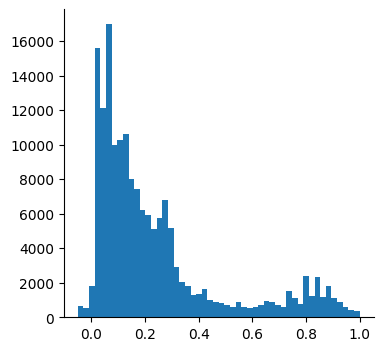

In [548]:
plt.hist(adata.obs["dpt_label"],bins=50)

(array([2.0000e+00, 0.0000e+00, 1.3000e+01, 8.7000e+01, 9.8070e+03,
        1.8725e+04, 1.2559e+04, 1.1760e+04, 1.2517e+04, 1.3192e+04,
        1.2403e+04, 1.0709e+04, 8.1150e+03, 6.5760e+03, 5.7190e+03,
        4.8450e+03, 3.8540e+03, 2.7790e+03, 2.0890e+03, 1.6180e+03,
        1.4620e+03, 1.1840e+03, 1.0970e+03, 1.0780e+03, 9.4700e+02,
        8.6700e+02, 8.1900e+02, 7.0600e+02, 7.7200e+02, 8.0600e+02,
        7.5200e+02, 7.7500e+02, 8.9100e+02, 9.8700e+02, 1.0760e+03,
        1.1650e+03, 1.4290e+03, 1.7490e+03, 2.1140e+03, 2.0850e+03,
        1.7970e+03, 1.6570e+03, 1.4440e+03, 5.5300e+02, 2.3600e+02,
        1.8600e+02, 1.3200e+02, 5.2000e+01, 1.4000e+01, 3.0000e+00]),
 array([-0.08568503, -0.06225409, -0.03882314, -0.0153922 ,  0.00803874,
         0.03146968,  0.05490062,  0.07833156,  0.1017625 ,  0.12519344,
         0.14862438,  0.17205532,  0.19548626,  0.2189172 ,  0.24234814,
         0.26577908,  0.28921002,  0.31264097,  0.33607191,  0.35950285,
         0.38293379,  0.40

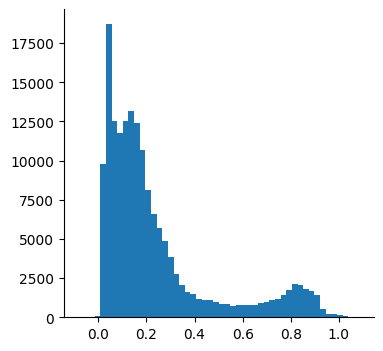

In [549]:
plt.hist(adata.obs["light_pred"],bins=50)

In [601]:
adata

AnnData object with n_obs × n_vars = 166204 × 2146
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei

In [602]:
new_dpt=adata.obs[["dpt_label","light_pred"]]
new_dpt.to_csv("../../important_processed_data/11.19_lightGBM_pred_and_orig.csv")

,2,2.1,2.2,4,4.1,4.2,6,6.1,6.2,8,...,14,14.1,14.2,16,16.1,16.2,18,18.1,18.2,geneid
1,3943.0,4087.0,4242.0,3521.0,3577.0,3704.0,3386.0,3519.0,3314.0,2311.0,...,2468.00,2534.0,2622.0,2711.0,2877.00,2807.0,2064.0,2252.0,2152.0,Gnai3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,Pbsn
3,115.0,126.0,123.0,143.0,148.0,146.0,175.0,177.0,176.0,91.0,...,67.00,74.0,73.0,91.0,75.00,81.0,31.0,44.0,41.0,Cdc45
4,6629.0,6747.0,6716.0,8151.0,8377.0,8346.0,15010.0,15301.0,15322.0,13170.0,...,22002.00,22809.0,22871.0,20389.0,20746.00,20643.0,14685.0,15369.0,15307.0,H19
5,51.0,35.0,37.0,55.0,57.0,40.0,64.0,78.0,73.0,51.0,...,45.00,63.0,57.0,48.0,64.00,54.0,39.0,44.0,42.0,Scml2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN
37988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN
37989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN
37990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,Vmn1r-ps147
